In [1]:
# 데이터 처리에 필요한 Pandas 라이브러리를 불러옵니다.
import pandas as pd

# 미리 다운받은 CSV 파일을 불러옵니다.
data = pd.read_csv('data/temperature_electricity.csv', encoding='UTF8')

# 불러온 데이터 중 숫자가 아닌 값을 업애줍니다.
data = data.dropna()

In [2]:
# 데이터 시각화 라이브러리인 Matplotlip을 불러옵니다.
from matplotlib import pyplot as plt

# Matplotlib 라이브러리에서 시간을 다루는 date 라이브러리를 불러옵니다.
from matplotlib import dates

In [3]:
# CSV 파일에서 평균 기온, 최고 기온, 최저 기온만 불러옵니다.
temperature =data.loc[:, ["Average", "Highest", "Lowest"]].apply(pd.to_numeric)

# CSV 파일에서 날짜 데이터를 불러옵니다.
temperature_date = data["Date"]

# CSV 파일에서 전력 예비율 데이터를 가져옵니다.
electricity = data["Power Reserve Ratio(%)"]

# CSV 파일에서 날짜 데이터를 불러옵니다.
electricity_date = data["Date"]

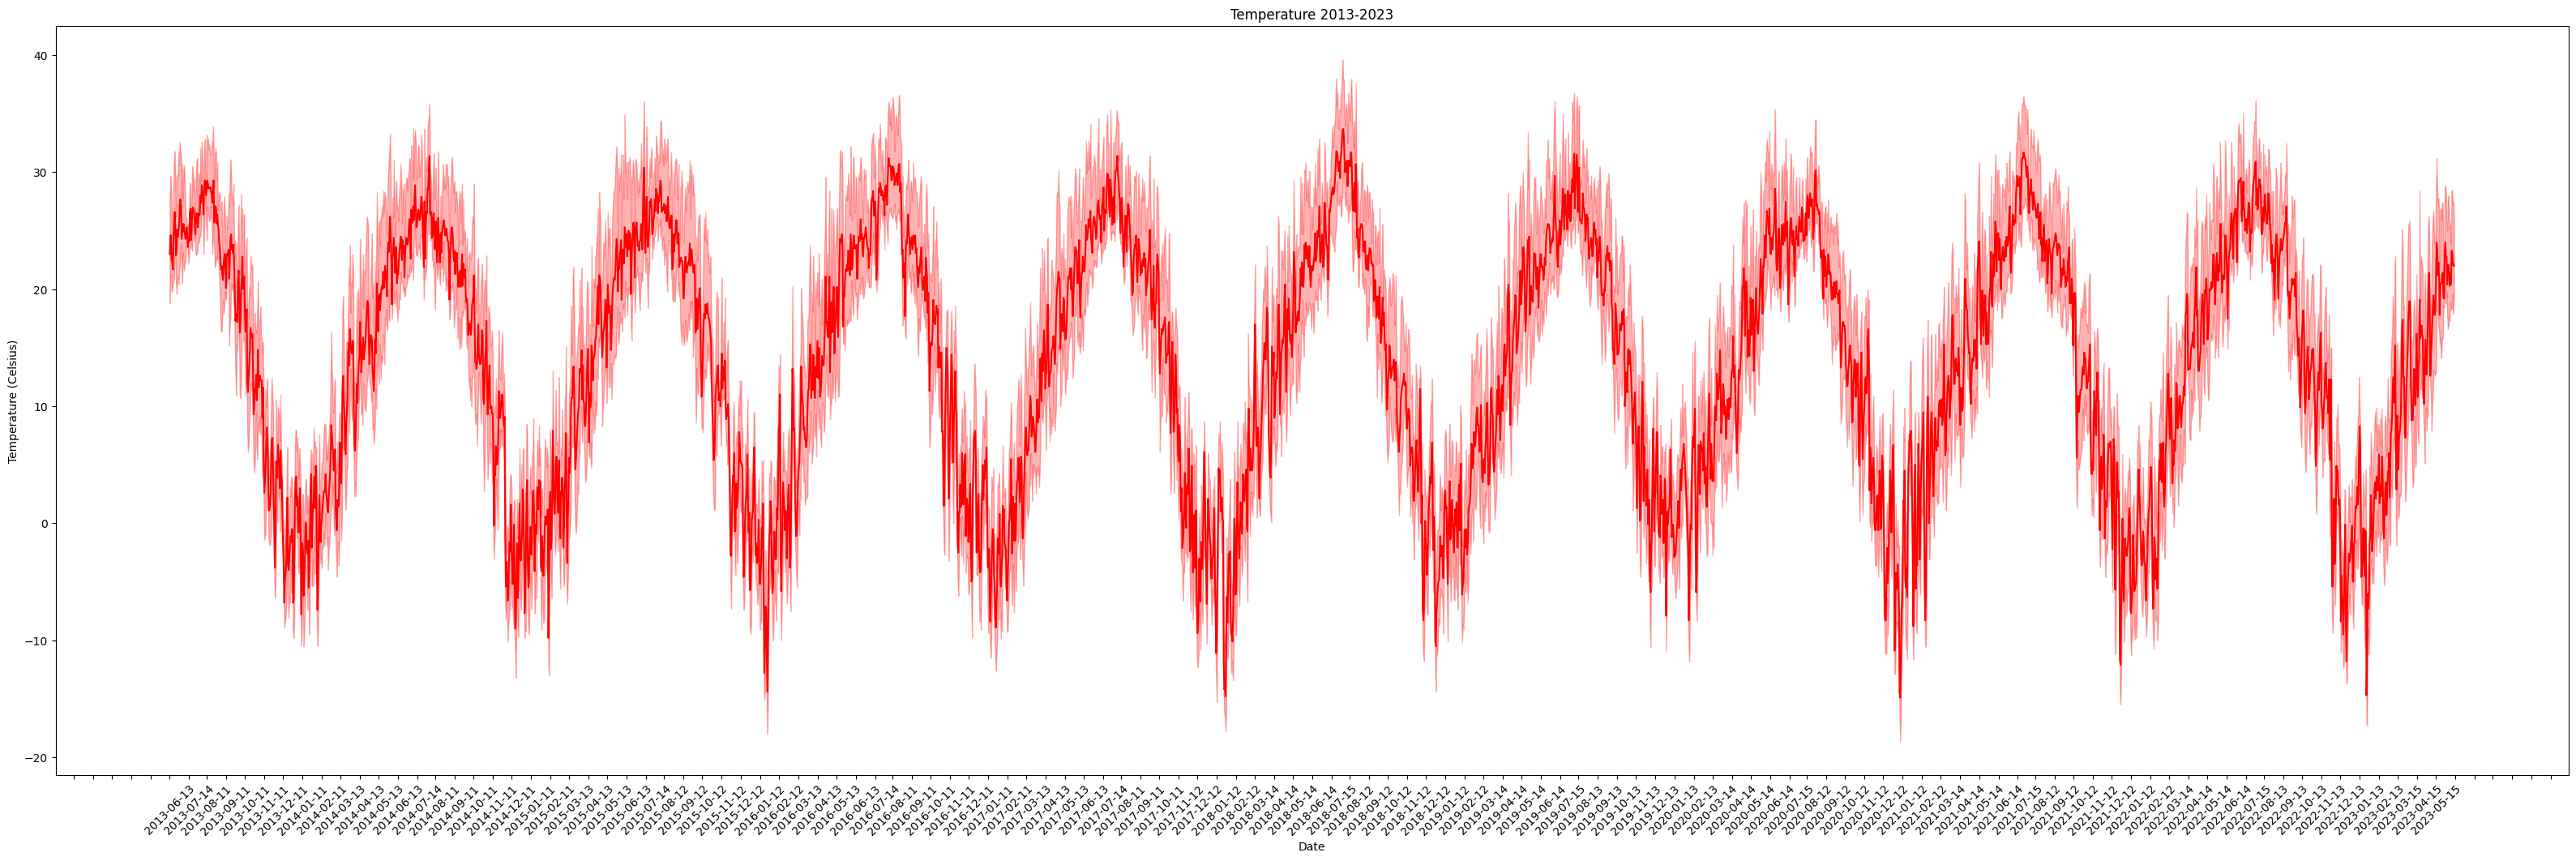

In [4]:
# Matplotlib 라이브러리로 기온 데이터를 그래프로 그려줍니다.
plt.figure(figsize=(40,12))
plt.fill_between(temperature_date,temperature["Highest"],temperature["Lowest"],color="red", alpha=0.3)
plt.plot(temperature_date,temperature["Average"],color="red")
plt.xticks(rotation=45)
plt.title("Temperature 2013-2023")
plt.xlabel("Date")
plt.ylabel("Temperature (Celsius)")
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator())

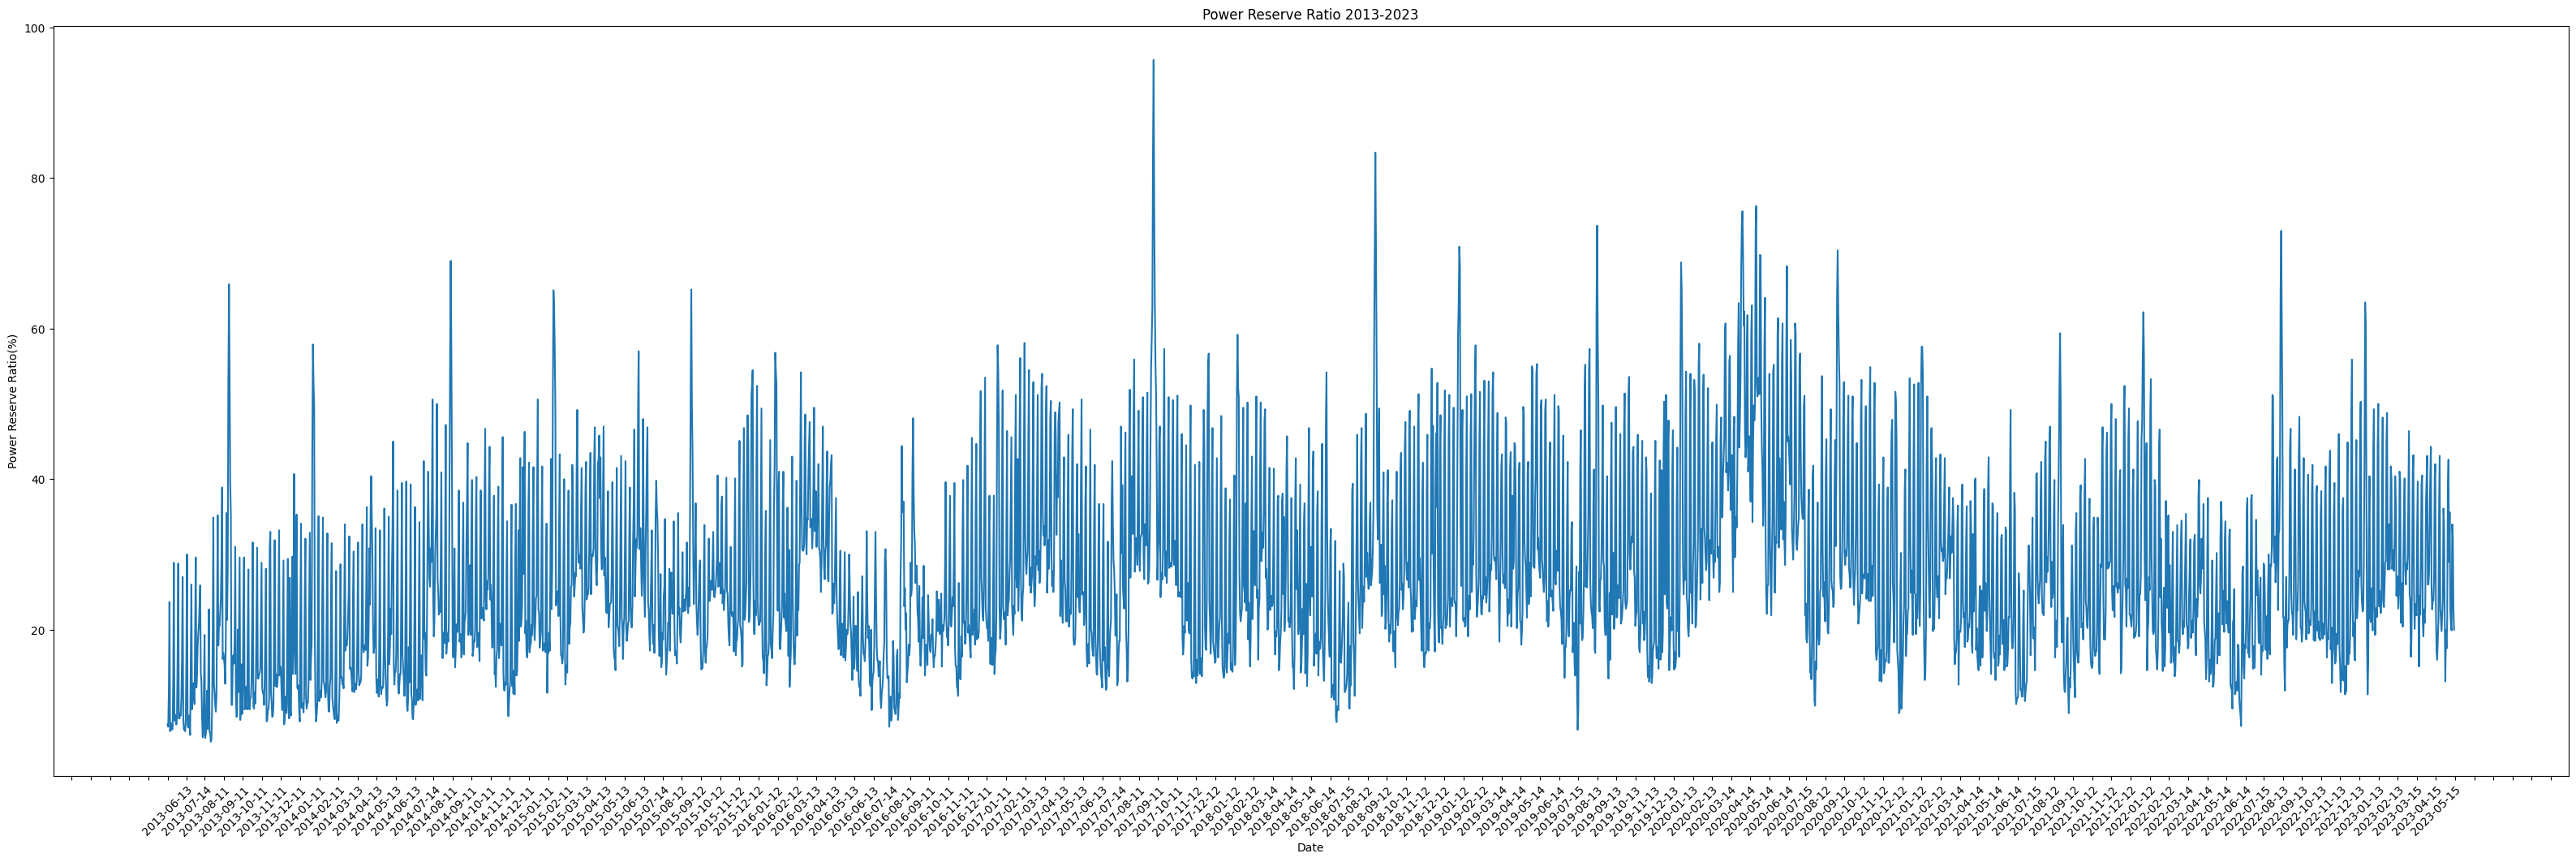

In [5]:
# Matplotlib 라이브러리로 전력 예비율 데이터를 그래프로 그려줍니다.
plt.figure(figsize=(40,12))
plt.plot(electricity_date,electricity)
plt.xticks(rotation=45)
plt.title("Power Reserve Ratio 2013-2023")
plt.xlabel("Date")
plt.ylabel("Power Reserve Ratio(%)")
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator())

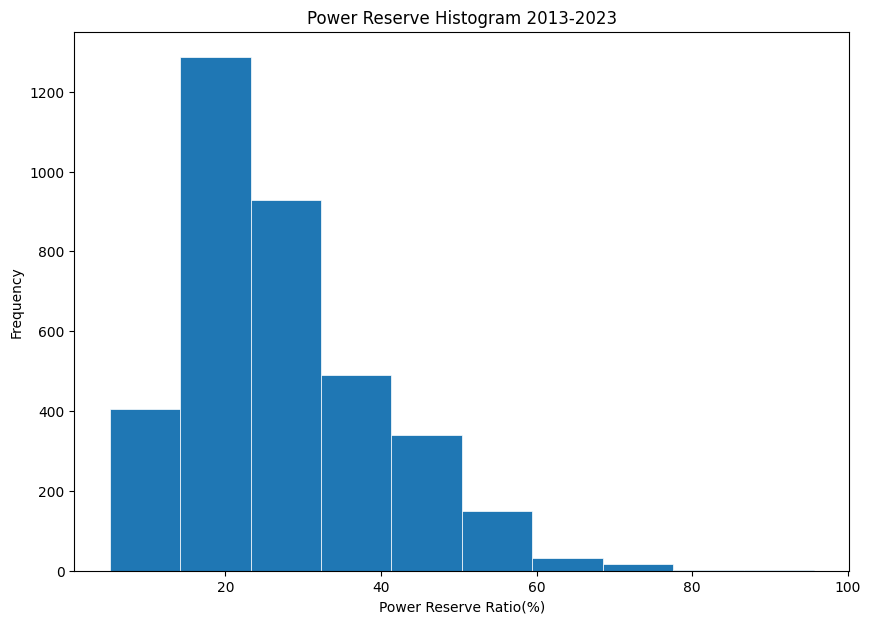

In [6]:
# 전력 예비율을 분석하기 쉽도록 히스트로그램으로 나타냅니다.
plt.figure(figsize=(10,7))
plt.title("Power Reserve Histogram 2013-2023")
plt.xlabel("Power Reserve Ratio(%)")
plt.ylabel("Frequency")
plt.hist(electricity, bins=10, linewidth=0.5, edgecolor="white")
plt.show()

In [7]:
# 전력 예비율 데이터를 정규화합니다.
normalization_power = (electricity-electricity.mean())/electricity.std()
normalization_power

0      -1.597159
1      -1.621436
2      -1.224912
3      -0.278111
4      -1.669990
          ...   
3648   -0.585619
3649    0.555398
3650    0.417828
3651   -0.375219
3652   -0.577527
Name: Power Reserve Ratio(%), Length: 3651, dtype: float64

In [8]:
# 과학 라이브러리인 Scipy와 데이터를 다루는 Numpy 라이브러리를 불러오고 정규분포 데이터를 생성합니다.
from scipy.stats import norm
import numpy as np
m = 0
s = 1

x = np.linspace(m-5*s, m+5*s, 100)
y = norm.pdf(x, m, s)

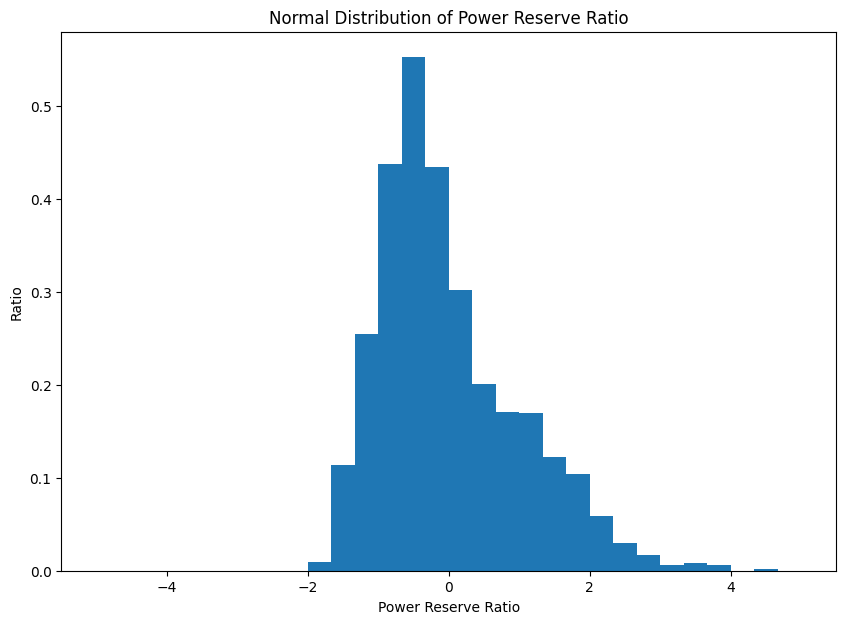

In [9]:
# 정규 분포 그래프와 정규화 한 전력 예비율 데이터를 그래프로 그려줍니다.
plt.figure(figsize=(10,7))
plt.title("Normal Distribution of Power Reserve Ratio")
plt.xlabel("Power Reserve Ratio")
plt.ylabel("Ratio")
plt.hist(normalization_power, range=(-5, 5),density=True, bins=30)
plt.show()

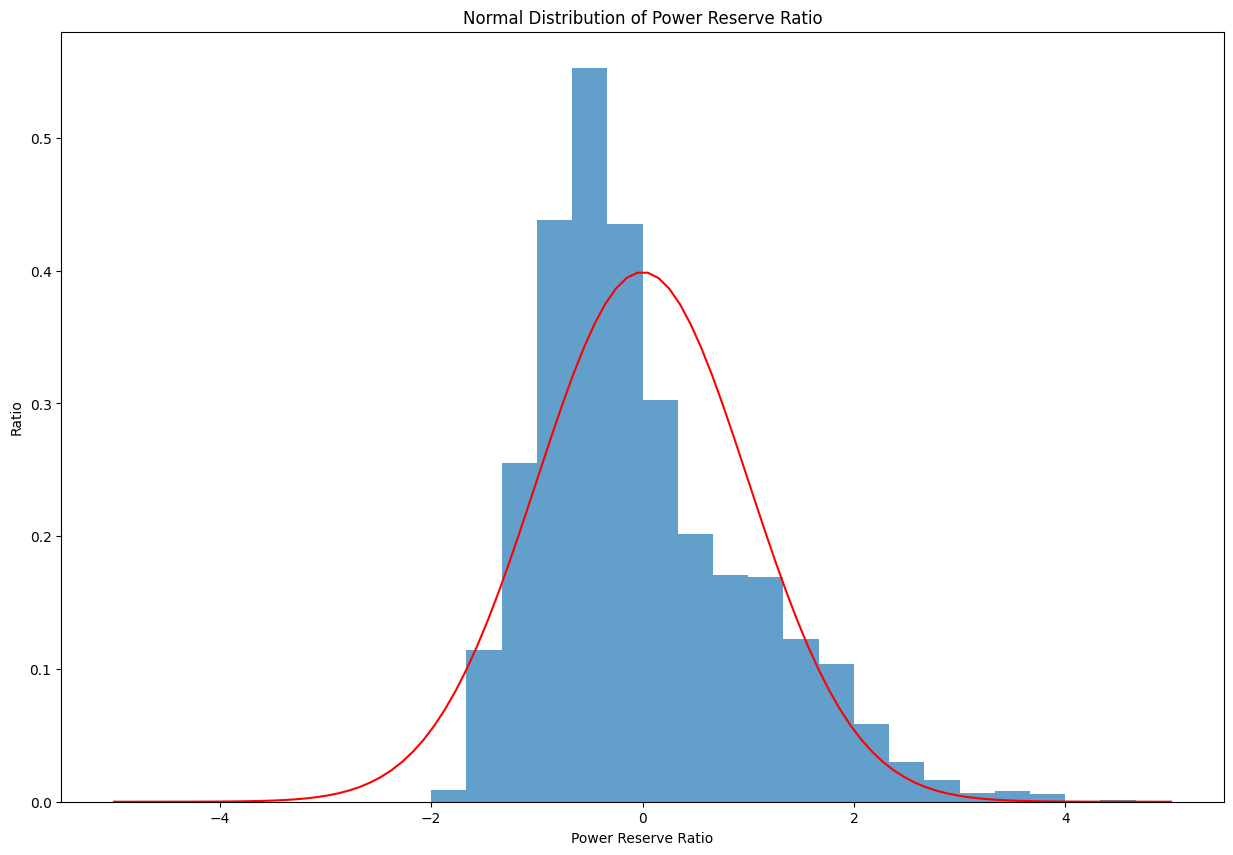

In [10]:
plt.figure(figsize=(15, 10))
# 히스토그램 그리기
plt.hist(normalization_power, bins=30, density=True, alpha=0.7, range=(-5, 5))

# 곡선 그래프 그리기
mu, sigma = np.mean(normalization_power), np.std(normalization_power)
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2 / (2*sigma**2))
plt.plot(x, y, color='red')

# 그래프 설정
plt.xlabel('Power Reserve Ratio')
plt.ylabel('Ratio')
plt.title('Normal Distribution of Power Reserve Ratio')

# 그래프 표시
plt.show()